# Stock Price prediction

In [2]:
#using svm to predict stock
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn import svm,preprocessing 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
stock_prices = pd.read_csv(r'prices.csv')
symbols = list(set(stock_prices['symbol']))

In [29]:
msft_prices = stock_prices[stock_prices['symbol']== 'MSFT']
msft_prices = msft_prices[['date','open','low','high','close','volume']]
msft_prices.to_csv('msft_prices.csv',sep='\t')
msft_dates = [pd.Timestamp(date) for date in msft_prices['date']]

In [30]:
msft_prices.head()

date       open        low       high      close      volume
544   2010-01-04  30.620001  30.590000  31.100000  30.950001  38409100.0
1012  2010-01-05  30.850000  30.639999  31.100000  30.959999  49749600.0
1480  2010-01-06  30.879999  30.520000  31.080000  30.770000  58182400.0
1948  2010-01-07  30.629999  30.190001  30.700001  30.450001  50559700.0
2416  2010-01-08  30.280001  30.240000  30.879999  30.660000  51197400.0

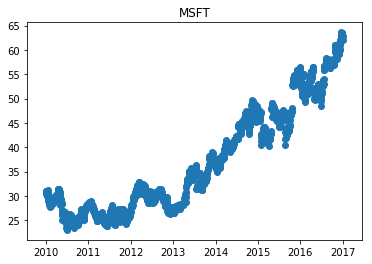

In [31]:
msft_close = np.array(msft_prices['close'],dtype='float')
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('MSFT')
plt.scatter(msft_dates,msft_close)
plt.show()

In [38]:
df=msft_prices[['date','open','low','high','volume','close']]
df.head()

date       open        low       high      volume      close
544   2010-01-04  30.620001  30.590000  31.100000  38409100.0  30.950001
1012  2010-01-05  30.850000  30.639999  31.100000  49749600.0  30.959999
1480  2010-01-06  30.879999  30.520000  31.080000  58182400.0  30.770000
1948  2010-01-07  30.629999  30.190001  30.700001  50559700.0  30.450001
2416  2010-01-08  30.280001  30.240000  30.879999  51197400.0  30.660000

In [53]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [54]:
X.head()

open        low       high      volume
544   30.620001  30.590000  31.100000  38409100.0
1012  30.850000  30.639999  31.100000  49749600.0
1480  30.879999  30.520000  31.080000  58182400.0
1948  30.629999  30.190001  30.700001  50559700.0
2416  30.280001  30.240000  30.879999  51197400.0

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc=StandardScaler()

In [55]:
sc.fit(X)
sc_x=sc.fit_transform(X)

In [56]:
sc_x

array([[-0.60138348, -0.5780899 , -0.58259347, -0.3043199 ],
       [-0.58007365, -0.57342694, -0.58259347,  0.16276128],
       [-0.57729418, -0.58461817, -0.58443224,  0.51008301],
       ...,
       [ 2.43574413,  2.42864658,  2.38702962, -1.28275003],
       [ 2.38571204,  2.41932028,  2.36864177, -1.46408404],
       [ 2.39497704,  2.35403746,  2.34933471, -0.83271616]])

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [57]:
rf=RandomForestRegressor()

In [59]:
rf.fit(X_train,y_train)

C:\Users\nit\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
score_rf=rf.score(X_test,y_test)

In [63]:
test=np.array([30.879999,30.520000,31.080000,58182400])

test=test.reshape(1,-1)

In [64]:
rf.predict(test)

array([30.8320002])

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
linear=LinearRegression()

In [69]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [80]:
score_lr=linear.score(X_test,y_test)

In [72]:
from sklearn.neighbors import KNeighborsRegressor as knn


In [73]:
knn=knn()

In [81]:
knn.fit(X_train,y_train)
score_knn=knn.score(X_test,y_test)

In [78]:
names=['rf','linear','knn']

In [82]:
results=[]
results.append(score_rf)
results.append(score_lr)
results.append(score_knn)

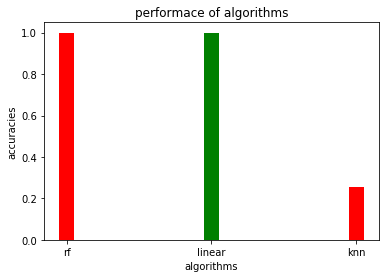

In [83]:
tick_label = ['rf','linear','knn'] 
  
plt.bar(names,results, tick_label = tick_label, 
        width = 0.1, color = ['red', 'green']) 
   
plt.xlabel('algorithms') 
plt.ylabel('accuracies') 
plt.title('performace of algorithms') 
plt.show() 
